In [1]:
from matplotlib import image as img
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import convolve2d
from sklearn.cluster import KMeans

## Problem 1

Loading data

In [3]:
X = pd.read_csv('problem1data.csv', delimiter='\s+').to_numpy()
print(X.shape)

(84, 2)


Plotting data

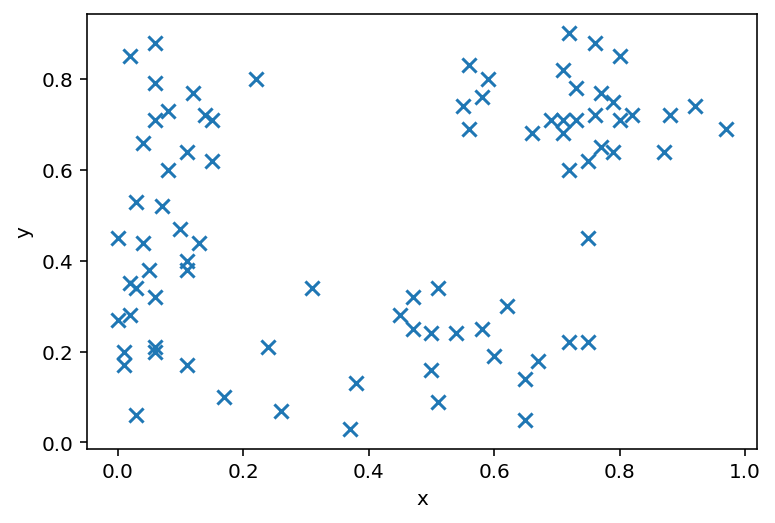

In [4]:
plt.figure(1, dpi=144)
plt.scatter(X[:,0], X[:,1], marker='x', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Creating a KMeans, 3 cluster fit

In [8]:
km = KMeans(n_clusters=3, init='random', random_state=0)
lab = km.fit_predict(X)

Plotting again including cluster labels

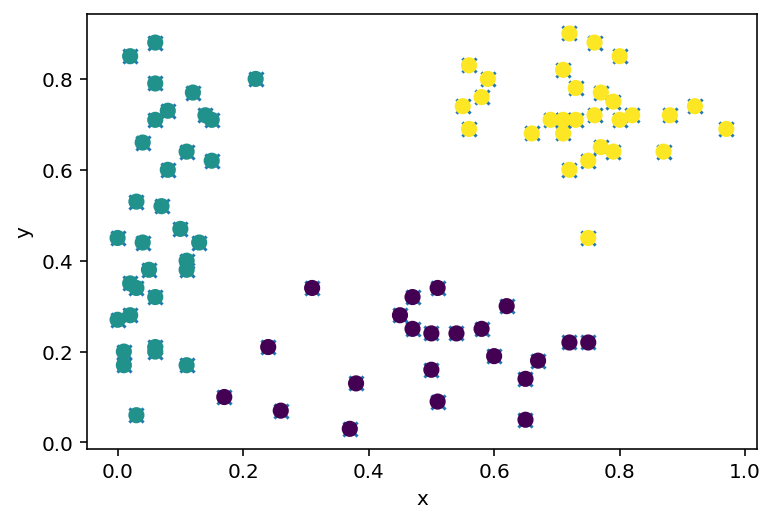

In [9]:
plt.figure(2, dpi=144)
plt.scatter(X[:,0], X[:,1], marker='x', s=50)
plt.scatter(X[:,0], X[:,1], marker='o', c=lab, s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 2

Loading data

In [11]:
imgdata = np.asarray(img.imread('sunspot.jpg')).astype(float)
print(imgdata.shape)

(600, 800, 3)


In [21]:
rr = imgdata[:,:,0]
gg = imgdata[:,:,1]
bb = imgdata[:,:,2]

In [22]:
# create 'Intensity map' based on colour maps
gs = np.sqrt((rr*rr + gg*gg + bb*bb) / 3.0)

# create X and Y arrays
x = np.arange(800.0) * 10.0
y = np.arange(600.0) * 10.0
xx, yy = np.meshgrid(x, y)

In [23]:
# Smooth the colour maps and GS map using 2D convolution
wind = 51
kern = np.full((wind, wind), 1.0)
kern = kern / np.sum(kern)
rrc = convolve2d(rr, kern, mode='same', boundary='fill', fillvalue=255)
ggc = convolve2d(gg, kern, mode='same', boundary='fill', fillvalue=255)
bbc = convolve2d(bb, kern, mode='same', boundary='fill', fillvalue=255)
gsc = convolve2d(gs_start, kern, mode='same', boundary='fill', fillvalue=255)

Plotting data

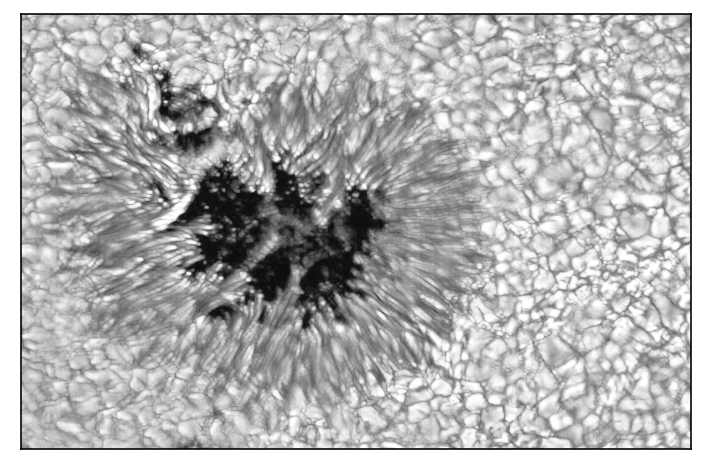

In [24]:
# plot greyscale image
plt.figure(3, dpi=144)
plt.contourf(x, y, gs, cmap='Greys_r', levels=128)
plt.xticks([])
plt.yticks([])
plt.show()

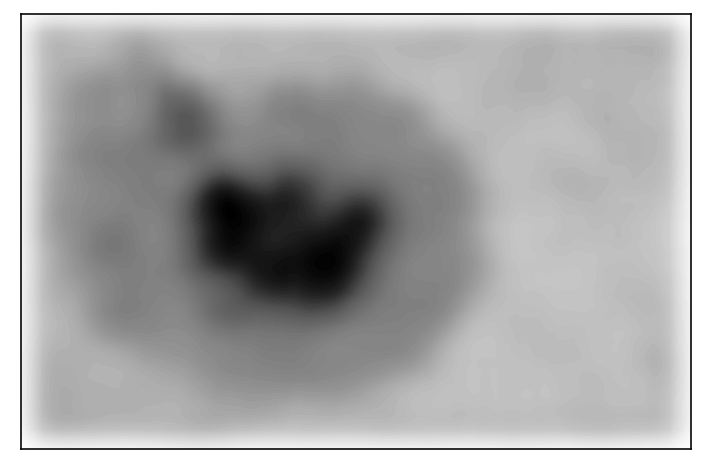

In [26]:
# plot smoothed greyscale image
plt.figure(4, dpi=144)
plt.contourf(x, y, gsc, cmap='Greys_r', levels=128)
plt.xticks([])
plt.yticks([])
plt.show()

Fitting KMeans

In [27]:
gsrav = np.atleast_2d(gsc.ravel()).T
km = KMeans(n_clusters=2)
lab = km.fit_predict(gsrav)
labmap = lab.reshape((600, 800))

Plotting sunspot

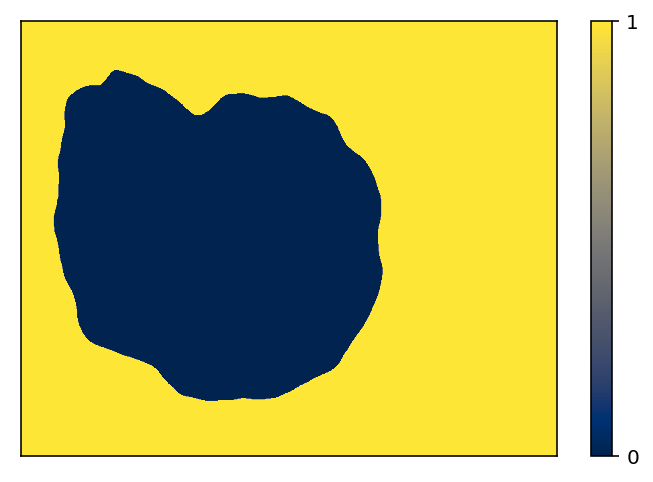

In [29]:
# plot smoothed greyscale image
plt.figure(5, dpi=144)
plt.contourf(x, y, labmap, cmap='cividis', levels=128)
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
plt.xticks([])
plt.yticks([])
plt.show()

How big is the sunspot?

In [31]:
npix = np.sum(labmap == 0)
# Area of each pixel is 0.0001 Sq.Mm., hence, the area is Npixels*0.0001
print(f'Sunspot area: {npix * 0.0001:.2f} Sq. Mm.')

Sunspot area: 17.49 Sq. Mm.
